<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [25]:
df = df.iloc[:,2:]
df.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [26]:
type(df)

pandas.core.frame.DataFrame

In [5]:
import seaborn as sns

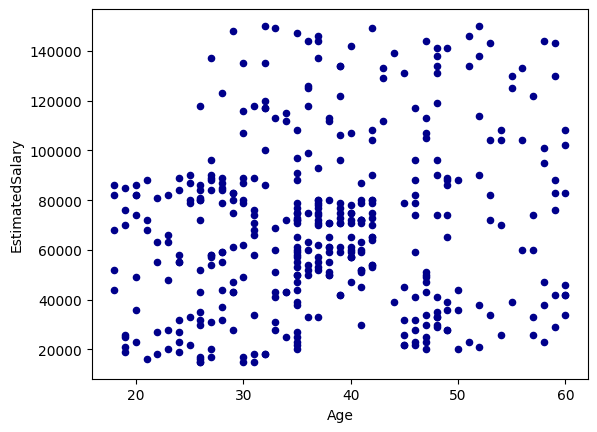

In [6]:
ax1 = df.plot.scatter(x='Age',
                      y='EstimatedSalary',
                      c='DarkBlue')

In [7]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(128,activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 32ms/step - loss: 748.8868 - accuracy: 0.5781 - val_loss: 390.0366 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 186.3023 - accuracy: 0.5656 - val_loss: 251.7708 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 141.7052 - accuracy: 0.5344 - val_loss: 79.1936 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 93.5334 - accuracy: 0.4781 - val_loss: 43.2057 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 61.1428 - accuracy: 0.4781 - val_loss: 48.7211 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 29.8294 - accuracy: 0.5281 - val_loss: 50.2217 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 53.5332 - accuracy: 0.5219 - val_loss: 53.4915 - val_accuracy: 

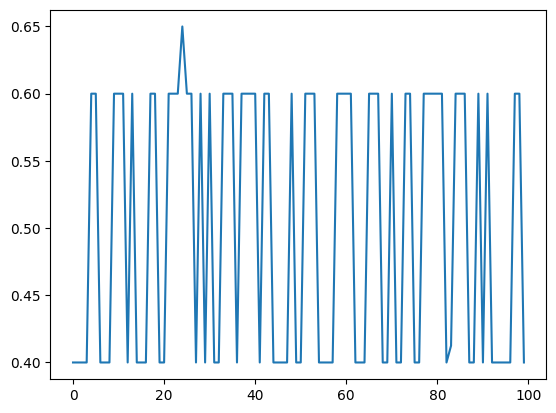

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [16]:
# Apply scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
type(X_train_scaled)

numpy.ndarray

<ipython-input-32-34c27f1060e7>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1], cmap='hot')


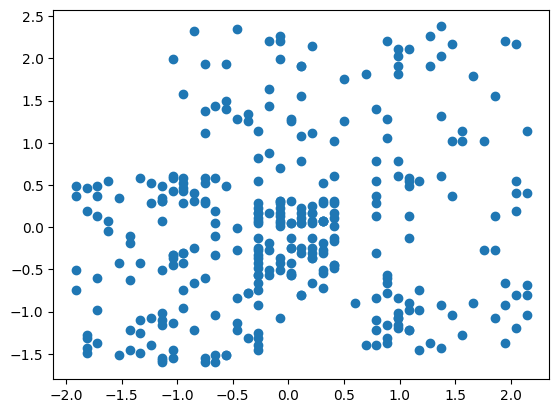

In [32]:

# Scatter plot
#plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1], c=X_train_scaled[:,0], cmap='hot')
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1], cmap='hot')
# Display the plot
plt.show()

In [33]:
model = Sequential()

model.add(Dense(128,activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 47ms/step - loss: 0.7311 - accuracy: 0.3156 - val_loss: 0.6927 - val_accuracy: 0.5500
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6683 - accuracy: 0.7063 - val_loss: 0.6286 - val_accuracy: 0.8375
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6153 - accuracy: 0.8281 - val_loss: 0.5762 - val_accuracy: 0.8625
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5709 - accuracy: 0.8469 - val_loss: 0.5317 - val_accuracy: 0.8750
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5330 - accuracy: 0.8594 - val_loss: 0.4937 - val_accuracy: 0.8500
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4991 - accuracy: 0.8656 - val_loss: 0.4620 - val_accuracy: 0.8250
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4700 - accuracy: 0.8687 - val_loss: 0.4347 - val_accuracy: 0.8375
Epoch 8/10

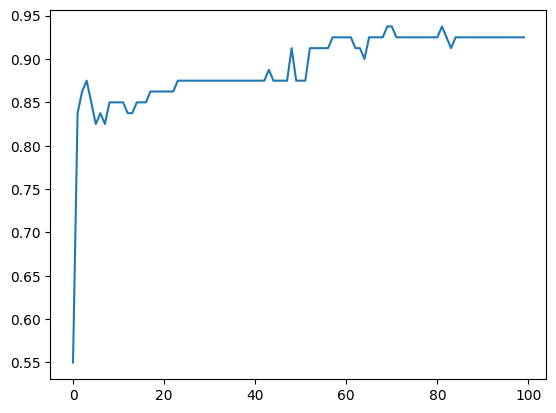

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])